# Explore $1^\mathrm{st}$ and $2^\mathrm{nd}$ order Euler and $4^\mathrm{th}$ order Runge-Kutta solution methods

This first cell simply loads some necessary stuff. To 'run' a cell, select it and either click the little 'play' button on the left of it, or simply hit space-enter. Many cells do not necessarily output anything (I added some print statements, just so you know something happened).

Any cell, both text/markdown ones like this one, or code ones like the one below, you can double click and edit, modify and run again to see what does what. You should definitely try!

In [57]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

# These libraries will help make animated plots:
from IPython.display import clear_output
from time import sleep


%matplotlib inline 
plt.rcParams['figure.dpi'] = 200

print("Thanks for loading a bunch of useful libraries!")

Thanks for loading a bunch of useful libraries!


This is going to be interactive. 
Choose between two different potential ODEs to solve. Type 1 for dp/dt=cos(t) or 2 for dp/dt = 3 p t^2.

In [58]:
choosefunc  = 1
print("You selected the following option for the ODE to model:", choosefunc)

You selected the following option for the ODE to model: 1


The right-hand-sides of the ODEs are defined below (using functions) and in this case we also know the exact solutions, which are defined as well. 

Pay attention to the syntax similarities and differences. Just like in Matlab, you have to define the input parameters. The variable names of those parameters in the function do not have to be (and typically aren't) the same as when you call the function. As an example, the function f_RHS below just needs to get passed 2 input parameters (2 numbers or 2 arrays); but when you call the function, you can give those any name you want (for instance: x = 3; y = 4; z = f_RHS(x,y)). 

Another difference: in Matlab, you would define a function something like:
z = function(x,y)
where x and y are the inputs and z the output. As you see below, in python the variable that is *returned* is specified by the return statement instead. 

Perhaps the most important difference, which goes beyond functions, is that unlike Matlab, python cares about spacing! The body of a function *has* to be indented. For the same reason, you do not need an 'end function' or 'end def' statement. The 'end' is implied by jumping back from the indentation. 

The same cell below shows that this is also true for if-then statements: the if line (just like a 'def' start of a function) ends with a colon. That means that the next lines are the body of the if/then statement or function and need to be indented. The first line that is not indented ends the if-then or function. 

In [59]:
if choosefunc == 1:
    def f_RHS(t,p):
        return np.sin(t)
    def f_exact(t):
        return -np.cos(t)
    tmax = np.pi*4
else:
    def f_RHS(t,p):
        return 3*p*t**2
    def f_exact(t):
        return np.exp(t**3)
    tmax = 1

Choose an order of approximation. The choices are:

1st order forward Euler = 1

2nd order forward Euler = 2

4th order Runge-Kutta   = 4

In [60]:
order = 1

Choose an initial time to start solving from. Because we consider some examples where we know the exact solutions (in our function above), we compute the initial condition (solution at t=tmin) self-consistently to avoid mistakes: 

In [61]:
tmin = 0
p0 = f_exact(tmin)

Choose the number of steps to solve the ODE for:

In [62]:
N = 20

Below is the entire ODE solver function.

You'll see some of the things noted above in terms of if-then statements, and now also for loops, starting with a colon and indentation. 

You also see that *numpy* provides many of the same functions that are commonly used in Matlab, like `np.linspace(tmin, tmax, N+1)`, which generates a vector of equally spaced numbers between tmin and tmax in N+1 steps; and `np.zeros(x,y)` which generates a $x$ by $y$ array of zeros. The pre-fix `np.`linspace and `np.`zeros is necessary because this is not standard python but these are part of a separately loaded library, *numpy*. 

You have to pay close attention to array indices starting from 0 instead of 1 in Matlab. As a related consequence: when specifying a range of indices, the last one is not included (in Matlab it is). Example: solutions(1:3) would give the first 3 numbers of the vector/array solutions in Matlab, while in python you would write: solutions[0:3] (so, still 3, but the third element is not included). 

Note that the cell below only *defines* the function to do the forward Euler calculation, but we don't actually run it with any input. That is done in the cell below. 

In [63]:
def forwardEuler(somefunction,tmin,tmax,p0,N,order):
    dt = (tmax-tmin)/N
    times = np.linspace(tmin,tmax,N+1)
    solutions = np.zeros(len(times))
    solutions[0] = p0
    if order==2:
        solutions[1] = solutions[0] + dt * somefunction(times[0],solutions[0])

    for i in range(1,len(times)):
        if order==1:
            solutions[i] = solutions[i-1] + dt * somefunction(times[i-1],solutions[i-1])
        elif order==2:
            if i>1:
                solutions[i] = solutions[i-2] + 2*dt*somefunction(times[i-1],solutions[i-1]);
        else:
            k1 = somefunction(times[i-1],solutions[i-1]);
            k2 = somefunction(times[i-1]+dt/2,solutions[i-1]+k1*dt/2);
            k3 = somefunction(times[i-1]+dt/2,solutions[i-1]+k2*dt/2);
            k4 = somefunction(times[i-1]+dt,solutions[i-1]+k3*dt);
            solutions[i] = solutions[i-1] + dt*(k1+2*k2+2*k3+k4)/6;
        
    return times, solutions

Lets see if it works. 

Few more new things below:
we use a simple summation, but also from numpy (so `np.sum`), as well as absolute values from `np.abs`.

We actually save the simulation results to files with pretty straightforward numpy savetxt commands; one file for the times and one for the solutions. You can look in the resulting files to see what they look like (not vey interesting). 

We calculate the exact solution for a fine grid using functions already used above.

We plot a bunch of things. Most of the syntax is very similar to Matlab, but it is provided by the python library matplotlib, which we abbreviated as plt. So every plotting function has plt-dot-thefunction, such as `plt.plot`. 
A potentially important note: in regular python scripts you need to write plt.show() to actually show the generated plot, but in these jupyter notebooks it appears to be the default behavior.

Axis labels and plot titles are done very similar to Matlab.

Notice an example of string concatenation. We turn the number N into a string, and paste a couple of smaller strings together into a large one as the title of our plot.

The error of approximation is  0.2


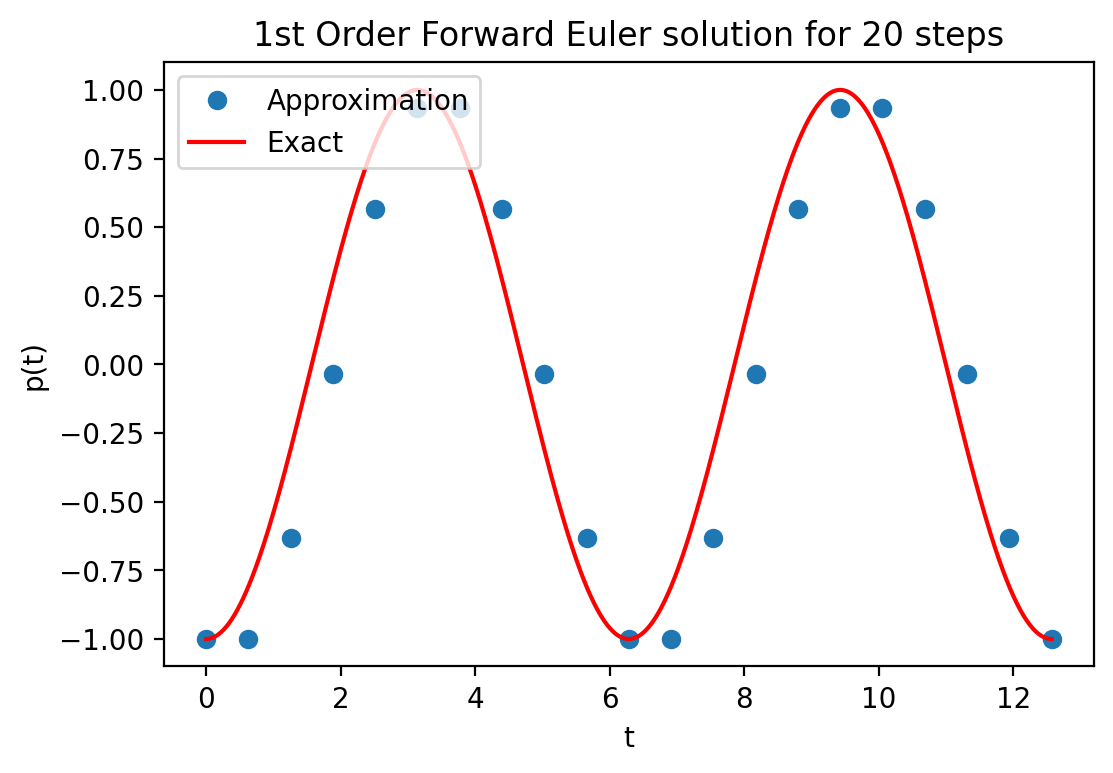

In [64]:
times, solutions = forwardEuler(f_RHS,tmin,tmax,p0,N,order)

error = np.sum(np.abs(solutions - f_exact(times)))/N
print("The error of approximation is ", round(error,2))

# Save the solution
np.savetxt('times.txt', times)
np.savetxt('solutions.txt', solutions)


timesfine = np.linspace(tmin,tmax,1000)
exact = f_exact(timesfine)

plt.figure()
# Plot solution
plt.plot(times, solutions, marker="o",linestyle="None",label="Approximation")
plt.plot(timesfine, exact, color='red',label="Exact")

# Axis labels
plt.xlabel('t')
plt.ylabel('p(t)')
if order == 1:
    method = '1st Order Forward Euler solution for '
elif order == 2:
    method = '2nd Order Forward Euler solution for '
else:
    method = '4th Order Runge-Kutta solution for '

title_string = method+str(N)+' steps'
plt.title(title_string)
plt.legend(loc="upper left")
plt.show()

Here is a nice visualization of how the Forward Euler method works. Starting from our user-defined initial value, we plug the current time and (when appropriate) known solution into the RHS of our ODE, i.e. into the prescribed derivative. This tells us the slope at at that point. The solution at the next time-step is then the solution at the previous time-step plus $\Delta t\times$ the slope. This is visualized by the arrows at each time-step, pointing from the previous solution to the new solution. I'm also plotting the exact solution to show how good/bad our approximate solution is. You can re-run this for different number of time-steps $N$ between $t_\mathrm{min}$ and $t_\mathrm{max}$, i.e. for different time-step sizes $\Delta t=(t_\mathrm{max}-t_\mathrm{min})/N$ to see how the numerical solution improves/deteriorates. 

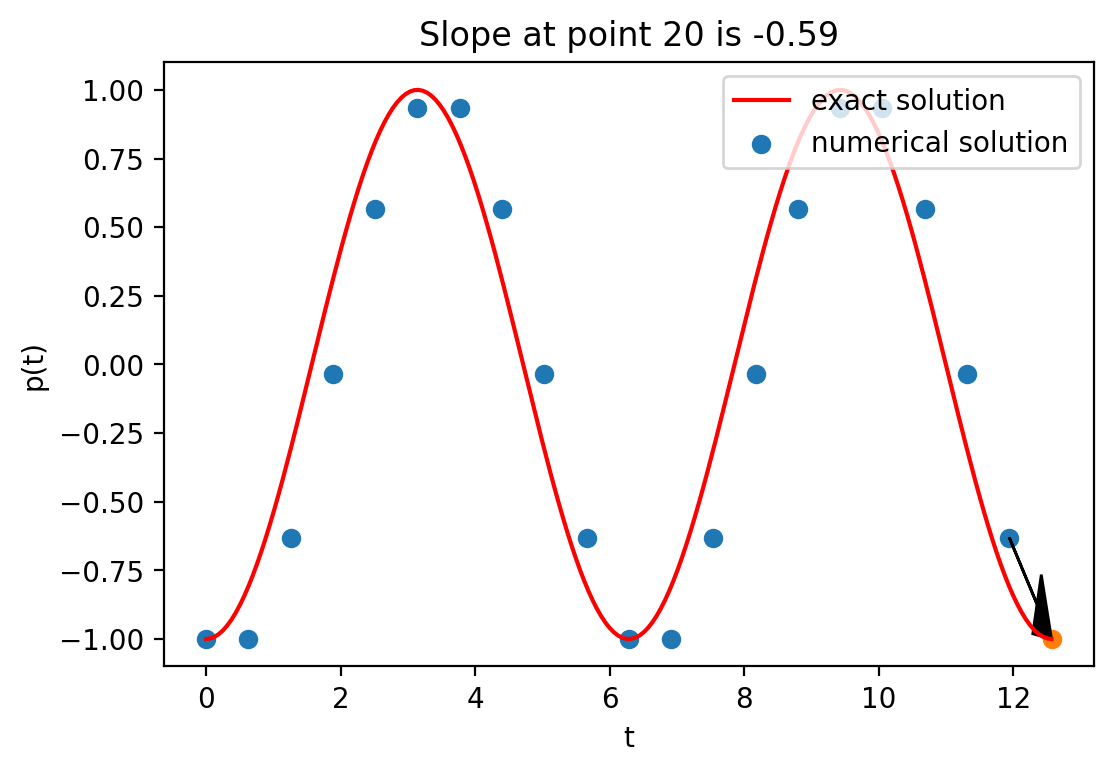

In [65]:
plt.figure()
# Compute exact solution for 200 points between tmin and tmax
# That way the exact solution curve will look smooth even when the 
# approximate forward Euler solution is computer for a small number of points 
# (in other words, for large time-step sizes)
x_fine = np.linspace(tmin,tmax,200)
exact = f_exact( x_fine  )

times, solutions = forwardEuler(f_RHS,tmin,tmax,p0,N,order);

for i in range(1,N+1):
  plt.plot(x_fine, exact,'r-',label='exact solution')
  # plt.plot(times, f_RHS(times,solutions),'b.',label='RHS derivative')
  title_i = 'Slope at point ' +  str(i) + ' is ' + str(np.round(f_RHS(times[i-1],solutions[i-1]),2))
  plt.title(title_i)
  plt.scatter(times[:i],solutions[:i],label="numerical solution")
  plt.scatter(times[i],solutions[i])
  # Axis labels
  plt.xlabel('t')
  plt.ylabel('p(t)')  
  plt.legend(loc='upper right');

  plt.arrow(times[i-1], solutions[i-1], times[i]-times[i-1], solutions[i]-solutions[i-1], head_width=0.25, head_length=0.25, color='black',length_includes_head=True)
  plt.show()
  sleep(0.5*20/N)
  if(i<len(times)-1):
    clear_output(wait=True)

Now, return to the top and make changes to the input to try out different ODE's, different solution methods, different number of time-steps, etc.

# Error Analyses

Initialize some arrays to hold the solutions, and define an increasing nr of time-steps to computer errors for (i.e., from 10 to 110 steps in increments of 10):

In [16]:
step_sizes = np.linspace(10,110,11).astype(int)

nr_errors = len(step_sizes)
errors    = np.zeros(nr_errors)
steps     = np.zeros(nr_errors)

Create a figure handle, and a vector of all orders of approximation.

Then, call the same ODE solver function as above, but in 1 additional loop over the orders of approximation and another nested loop over an increasing number of (therefore smaller) time-step. For each order and nr of time-steps, we save the error and time-step size. And finally we plot the results. A significant fraction of the code below is to generate 3 stacked sub-plots with one shared horizontal axis. This is done by the axs[j] which essentially references 3 subplots. 

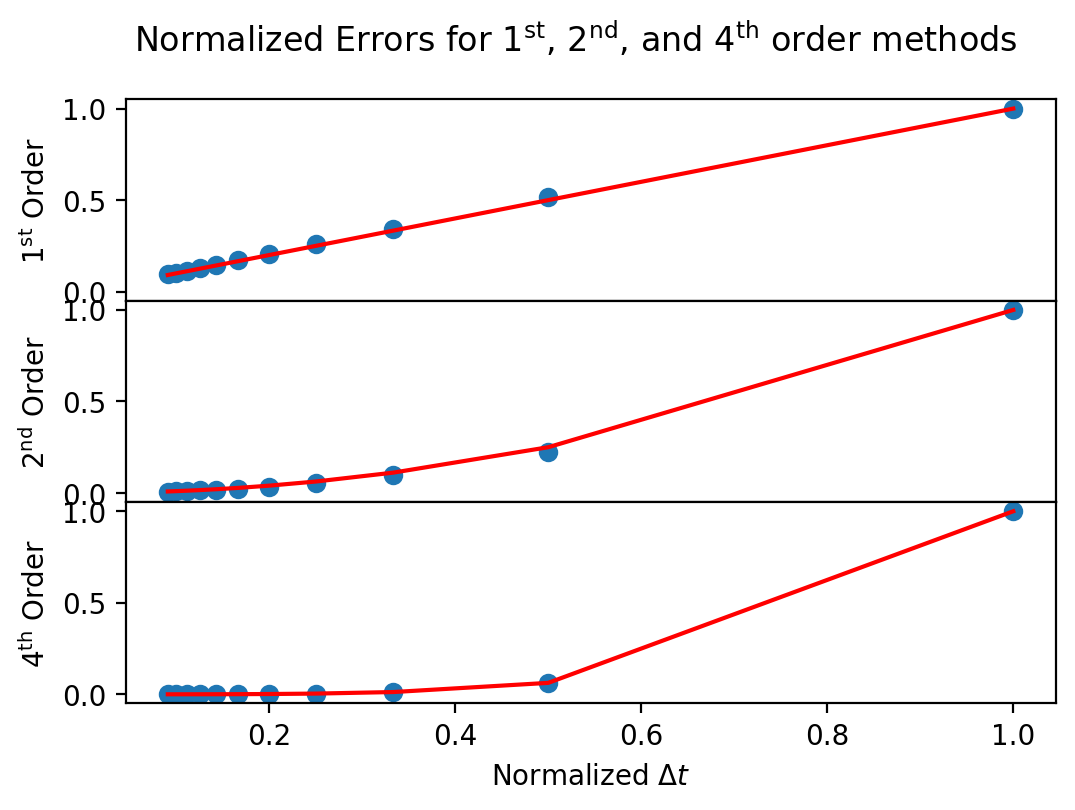

In [17]:
fig, axs = plt.subplots(3,sharex=True, sharey=True, gridspec_kw={'hspace': 0})
j=0
orders = [1,2,4]
for order in orders:
    i=0
    for N in step_sizes:
        times, solutions = forwardEuler(f_RHS,tmin,tmax,p0,N,order)
        error = np.sum(np.abs(solutions - f_exact(times)))/N
        errors[i] = error
        steps[i]  = (tmax-tmin)/N
        i = i+1
    # plt.figure()
    # Plot solution
    if order ==1:
        axs[j].plot(steps/np.max(steps), errors/np.max(errors), marker="o",linestyle="None")
        axs[j].plot(steps/np.max(steps),steps/np.max(steps), color='red')
    elif order == 2:
        axs[j].plot(steps/np.max(steps), errors/np.max(errors), marker="o",linestyle="None")
        axs[j].plot(steps/np.max(steps),(steps/np.max(steps))**2, color='red')
    else:
        axs[j].plot(steps/np.max(steps), errors/np.max(errors), marker="o",linestyle="None")
        axs[j].plot(steps/np.max(steps),(steps/np.max(steps))**4, color='red')


    # Axis labels
    axs[2].set_xlabel('Normalized $\Delta t$')
    fig.suptitle('Normalized Errors for $1^\mathrm{st}$, $2^\mathrm{nd}$, and $4^\mathrm{th}$ order methods')
    if order == 1:
        method = '$1^\mathrm{st}$ Order'
    elif order == 2:
        method = '$2^\mathrm{nd}$ Order'
    else:
        method = '$4^\mathrm{th}$ Order'

    axs[j].set_ylabel(method)

    j=j+1
        
filename = 'all_errors.pdf'
plt.show()
# plt.savefig(filename)

Note that the markers (circles) and lines are not for the same plot in each subplot! The markers are for the actual errors computer from our forward Euler approximation, while the lines show a linear, quadratic, and 4-th order function of the normalized error. In other words, this shows that indeed we achieve the order of accuracy that each method is supposed to achieve. 